In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a9ab1b9d23ce1f4f0e590ea8c68b899b


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | valparaiso
Processing Record 2 of Set 1 | talpa
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | kudahuvadhoo
Processing Record 6 of Set 1 | cidreira
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | saint-pierre
Processing Record 9 of Set 1 | simiti
Processing Record 10 of Set 1 | marsaxlokk
Processing Record 11 of Set 1 | great yarmouth
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | normandin
Processing Record 14 of Set 1 | edelira
Processing Record 15 of Set 1 | belmonte
Processing Record 16 of Set 1 | chifeng
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | odessa
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | stoyba
City not found. Skipping...
Processing Record 21 of Set 1 | t

Processing Record 38 of Set 4 | burica
City not found. Skipping...
Processing Record 39 of Set 4 | codrington
Processing Record 40 of Set 4 | bambous virieux
Processing Record 41 of Set 4 | poya
Processing Record 42 of Set 4 | lagoa
Processing Record 43 of Set 4 | carnarvon
Processing Record 44 of Set 4 | viedma
Processing Record 45 of Set 4 | middelburg
Processing Record 46 of Set 4 | civitavecchia
Processing Record 47 of Set 4 | mutoko
Processing Record 48 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 49 of Set 4 | komsomolskiy
Processing Record 50 of Set 4 | bilma
Processing Record 1 of Set 5 | constitucion
Processing Record 2 of Set 5 | cabo san lucas
Processing Record 3 of Set 5 | knysna
Processing Record 4 of Set 5 | mbandaka
Processing Record 5 of Set 5 | porto de moz
Processing Record 6 of Set 5 | soe
Processing Record 7 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 8 of Set 5 | norman wells
Processing Record 9 of Set 5 | santa cruz


Processing Record 25 of Set 8 | puerto baquerizo moreno
Processing Record 26 of Set 8 | gawler
Processing Record 27 of Set 8 | lokosovo
Processing Record 28 of Set 8 | chumikan
Processing Record 29 of Set 8 | kaa-khem
Processing Record 30 of Set 8 | cairns
Processing Record 31 of Set 8 | viligili
City not found. Skipping...
Processing Record 32 of Set 8 | plymouth
Processing Record 33 of Set 8 | sheregesh
Processing Record 34 of Set 8 | los llanos de aridane
Processing Record 35 of Set 8 | poronaysk
Processing Record 36 of Set 8 | te anau
Processing Record 37 of Set 8 | alugan
Processing Record 38 of Set 8 | muravlenko
Processing Record 39 of Set 8 | aquiraz
Processing Record 40 of Set 8 | kegayli
City not found. Skipping...
Processing Record 41 of Set 8 | tecoanapa
Processing Record 42 of Set 8 | vryburg
Processing Record 43 of Set 8 | kiruna
Processing Record 44 of Set 8 | saint-joseph
Processing Record 45 of Set 8 | namtsy
Processing Record 46 of Set 8 | nhulunbuy
Processing Record 

Processing Record 13 of Set 12 | la maddalena
Processing Record 14 of Set 12 | kaeo
Processing Record 15 of Set 12 | bogorodskoye
Processing Record 16 of Set 12 | omboue
Processing Record 17 of Set 12 | grand forks
Processing Record 18 of Set 12 | cayenne
Processing Record 19 of Set 12 | mayachnyy
Processing Record 20 of Set 12 | dong xoai
Processing Record 21 of Set 12 | shingu
Processing Record 22 of Set 12 | mindelo
Processing Record 23 of Set 12 | raymond
Processing Record 24 of Set 12 | gizo
Processing Record 25 of Set 12 | sandanski
Processing Record 26 of Set 12 | payakumbuh
Processing Record 27 of Set 12 | ugoofaaru
Processing Record 28 of Set 12 | solnechnyy
Processing Record 29 of Set 12 | beloha
Processing Record 30 of Set 12 | kloulklubed
Processing Record 31 of Set 12 | bosaso
Processing Record 32 of Set 12 | mount pleasant
Processing Record 33 of Set 12 | mascote
Processing Record 34 of Set 12 | singaparna
Processing Record 35 of Set 12 | sabha
Processing Record 36 of Set

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Valparaiso,-33.04,-71.63,57.20,62,100,6.93,CL,2020-07-09 16:14:55
1,Talpa,28.83,-111.63,93.00,48,78,8.01,MX,2020-07-09 16:16:16
2,Rikitea,-23.12,-134.97,68.07,62,4,16.35,PF,2020-07-09 16:15:44
3,Kudahuvadhoo,2.67,72.89,84.27,72,100,6.44,MV,2020-07-09 16:16:16
4,Cidreira,-30.18,-50.21,55.54,62,0,19.42,BR,2020-07-09 16:16:17
5,Port Alfred,-33.59,26.89,73.00,50,89,5.99,ZA,2020-07-09 16:16:11
6,Saint-Pierre,-21.34,55.48,69.80,83,75,20.80,RE,2020-07-09 16:16:17
7,Simiti,7.96,-73.94,86.14,65,95,3.87,CO,2020-07-09 16:16:17
8,Marsaxlokk,35.84,14.54,81.00,61,20,5.82,MT,2020-07-09 16:16:17
9,Great Yarmouth,52.61,1.73,64.99,97,100,12.24,GB,2020-07-09 16:12:45


In [12]:
#Creating new column order
#City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed,
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Valparaiso,CL,2020-07-09 16:14:55,-33.04,-71.63,57.20,62,100,6.93
1,Talpa,MX,2020-07-09 16:16:16,28.83,-111.63,93.00,48,78,8.01
2,Rikitea,PF,2020-07-09 16:15:44,-23.12,-134.97,68.07,62,4,16.35
3,Kudahuvadhoo,MV,2020-07-09 16:16:16,2.67,72.89,84.27,72,100,6.44
4,Cidreira,BR,2020-07-09 16:16:17,-30.18,-50.21,55.54,62,0,19.42
...,...,...,...,...,...,...,...,...,...
538,Singaparna,ID,2020-07-09 16:17:46,-7.35,108.11,71.31,91,95,1.74
539,Sabha,LY,2020-07-09 16:17:46,27.04,14.43,97.70,11,0,11.34
540,Kibala,TD,2020-07-09 16:17:46,9.11,18.35,80.60,69,20,3.06
541,Sebezh,RU,2020-07-09 16:17:47,56.30,28.47,63.54,58,44,7.56


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1594311479.1376622

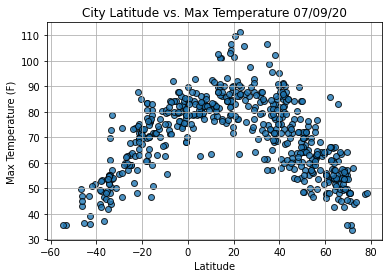

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

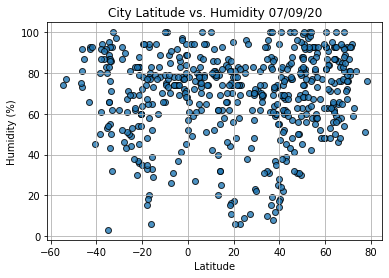

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

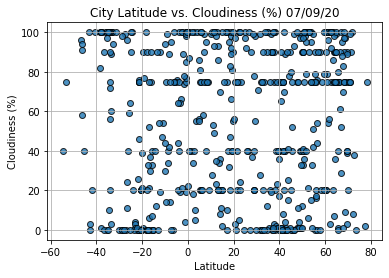

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

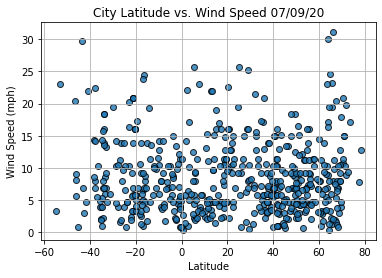

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print(f"The r-value is: {r_value:.3f}")

In [21]:
index13=city_data_df.loc[13]
index13


City                     Belmonte
Country                        BR
Date          2020-07-09 16:16:18
Lat                        -15.86
Lng                        -38.88
Max Temp                     80.6
Humidity                       65
Cloudiness                     40
Wind Speed                   8.05
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4      False
       ...  
538    False
539     True
540     True
541     True
542     True
Name: Lat, Length: 543, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Talpa,MX,2020-07-09 16:16:16,28.83,-111.63,93.00,48,78,8.01
3,Kudahuvadhoo,MV,2020-07-09 16:16:16,2.67,72.89,84.27,72,100,6.44
7,Simiti,CO,2020-07-09 16:16:17,7.96,-73.94,86.14,65,95,3.87
8,Marsaxlokk,MT,2020-07-09 16:16:17,35.84,14.54,81.00,61,20,5.82
9,Great Yarmouth,GB,2020-07-09 16:12:45,52.61,1.73,64.99,97,100,12.24
...,...,...,...,...,...,...,...,...,...
536,Mount Pleasant,US,2020-07-09 16:17:46,32.79,-79.86,84.99,83,90,5.82
539,Sabha,LY,2020-07-09 16:17:46,27.04,14.43,97.70,11,0,11.34
540,Kibala,TD,2020-07-09 16:17:46,9.11,18.35,80.60,69,20,3.06
541,Sebezh,RU,2020-07-09 16:17:47,56.30,28.47,63.54,58,44,7.56


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [26]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

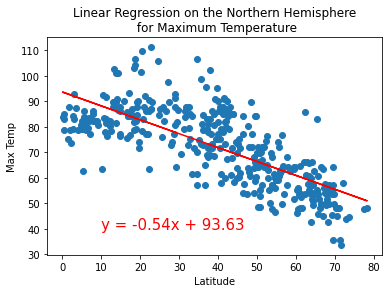

The r-value is: -0.740


In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere\n for Maximum Temperature','Max Temp',(10,40))

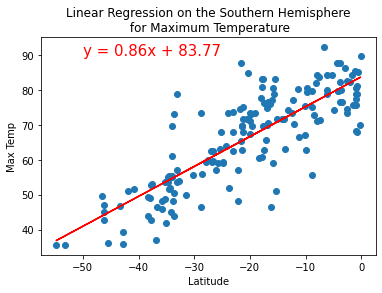

The r-value is: 0.826


In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,y_values,'Linear Regression on the Southern Hemisphere\n for Maximum Temperature','Max Temp',(-50,90))

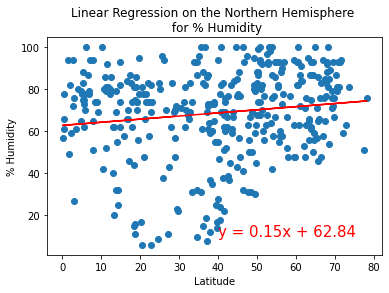

The r-value is: 0.143


In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

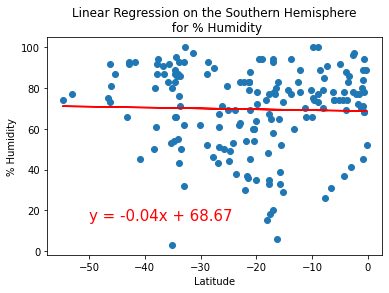

The r-value is: -0.028


In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-50,15))

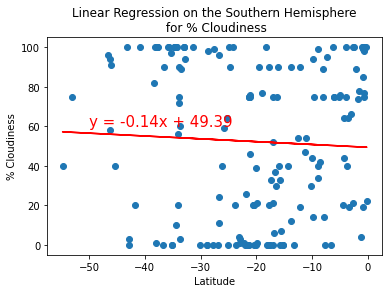

The r-value is: -0.048


In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere\n for % Cloudiness', '% Cloudiness',(-50,60))

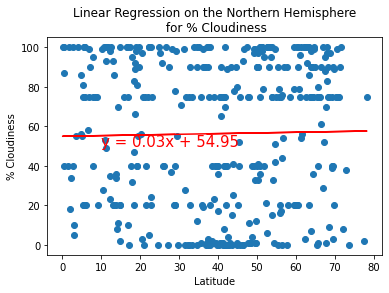

The r-value is: 0.019


In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,y_values,'Linear Regression on the Northern Hemisphere\n for % Cloudiness','% Cloudiness',(10,50))

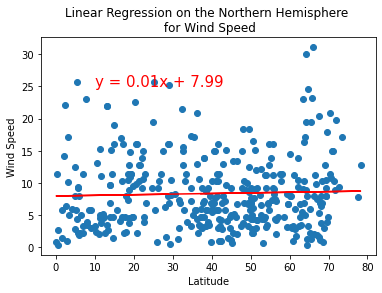

The r-value is: 0.035


In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,25))

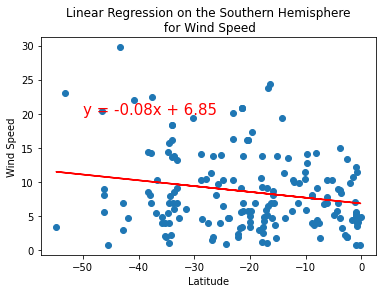

The r-value is: -0.194


In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere\n for Wind Speed','Wind Speed',(-50,20))